In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torchmetrics
from torch.nn import Conv2d, MaxPool2d, Dropout2d,Dropout, ReLU, Flatten, BatchNorm2d, BatchNorm1d, Linear
from torch.utils.data import DataLoader
device = "cuda:1"

In [2]:


layers =[Conv2d(3,64, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(64),
        Dropout(0.3),
        Conv2d(64,64, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(64),
        MaxPool2d((2, 2)),
        Conv2d(64,128, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(128),
        Dropout2d(0.4),
        Conv2d(128,128, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(128),
        MaxPool2d((2, 2)),
        Conv2d(128,256, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(256),
        Dropout2d(0.4),
        Conv2d(256,256, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(256),
        Dropout(0.4),
        Conv2d(256,256, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(256),
        MaxPool2d((2, 2)),
        Conv2d(256,512, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(512),
        Dropout2d(0.4),
        Conv2d(512,512, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(512),
        Dropout2d(0.4),
        Conv2d(512,512, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(512),
        MaxPool2d((2, 2)),
        Conv2d(512,512, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(512),
        Dropout2d(0.4),
        Conv2d(512,512, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(512),
        Dropout2d(0.4),
        Conv2d(512,512, (3, 3), padding=(1, 1)),
        ReLU(),
        BatchNorm2d(512),
        MaxPool2d((2, 2)),
        Dropout2d(0.5),
        Flatten(),
        Linear(512,512),
        ReLU(),
        BatchNorm1d(num_features=512),
        Dropout(0.5),
        Linear(512,10)
        ]

model = nn.Sequential(*layers).to(device)

In [3]:
ds = datasets.CIFAR10(".",download=True)
m=((ds.data/255).mean((0,1,2)))
s = ((ds.data/255).std((0,1,2)))
print(m,s)

Files already downloaded and verified
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]


In [4]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(m,s)])
train_set = datasets.CIFAR10(".",download=True,transform=transform,target_transform=torch.tensor)
val_set = datasets.CIFAR10(".",download=True,transform=transform,train=False,target_transform=torch.tensor)
train_loader = DataLoader(train_set,batch_size=128,shuffle=True)
val_loader = DataLoader(val_set,batch_size=128,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
epochs = 50
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(),lr=0.001,weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9,verbose=True)
accuracy = torchmetrics.Accuracy().to(device)
t_loss = []
v_loss = []
t_acc = []
v_acc = []

Adjusting learning rate of group 0 to 1.0000e-03.


In [6]:
from tqdm.auto import trange,tqdm
for epoch in trange(epochs):
    model.train()
    r_loss = 0
    r_acc = 0
    for X,y in tqdm(train_loader,leave=False):
        X,y = X.to(device),y.to(device)
        out = model(X)
        loss = loss_fn(out,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        r_loss+= loss.item()
        with torch.no_grad():
            r_acc +=accuracy(torch.argmax(out,1),y)
    t_loss.append(r_loss/len(train_loader))
    t_acc.append(r_acc/len(train_loader))
    model.eval()
    r_loss = 0
    r_acc = 0
    with torch.no_grad():
        for X,y in tqdm(val_loader,leave=False):
            X,y = X.to(device),y.to(device)
            out = model(X)
            loss = loss_fn(out,y)
            r_loss+= loss.item()
            r_acc +=accuracy(torch.argmax(out,1),y)
    v_loss.append(r_loss/len(val_loader))
    v_acc.append(r_acc/len(val_loader))
    print(f"{epoch+1}: loss: train = {t_loss[-1]}, val = {v_loss[-1]},accuracy: train = {t_acc[-1]}, val = {v_acc[-1]}")
    scheduler.step()

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

1: loss: train = 1.9132032016354144, val = 1.6437764816646334,accuracy: train = 0.2661285102367401, val = 0.3616495430469513
Adjusting learning rate of group 0 to 9.0000e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

2: loss: train = 1.4291229531588152, val = 1.2092393070836611,accuracy: train = 0.4692934453487396, val = 0.5711036324501038
Adjusting learning rate of group 0 to 8.1000e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

3: loss: train = 1.1283294089005123, val = 0.923452204541315,accuracy: train = 0.6010110378265381, val = 0.6781052350997925
Adjusting learning rate of group 0 to 7.2900e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

4: loss: train = 0.9543441607214301, val = 0.7959356375887424,accuracy: train = 0.6675670742988586, val = 0.7223101258277893
Adjusting learning rate of group 0 to 6.5610e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

5: loss: train = 0.8479255303702391, val = 0.7035624875298029,accuracy: train = 0.7084998488426208, val = 0.7562302350997925
Adjusting learning rate of group 0 to 5.9049e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

6: loss: train = 0.7504766359353614, val = 0.6794554677945149,accuracy: train = 0.7449608445167542, val = 0.7712618708610535
Adjusting learning rate of group 0 to 5.3144e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

7: loss: train = 0.6801183585773038, val = 0.5877213462998595,accuracy: train = 0.7718669772148132, val = 0.8063687086105347
Adjusting learning rate of group 0 to 4.7830e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

8: loss: train = 0.6215569597985738, val = 0.544843053893198,accuracy: train = 0.7914242148399353, val = 0.8196202516555786
Adjusting learning rate of group 0 to 4.3047e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

9: loss: train = 0.5684387920915014, val = 0.5117610270463968,accuracy: train = 0.8108295798301697, val = 0.829311728477478
Adjusting learning rate of group 0 to 3.8742e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

10: loss: train = 0.5100883856758742, val = 0.5065941538991807,accuracy: train = 0.8297674059867859, val = 0.8355419635772705
Adjusting learning rate of group 0 to 3.4868e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

11: loss: train = 0.47382825163319287, val = 0.4775744374794296,accuracy: train = 0.8416839838027954, val = 0.844936728477478
Adjusting learning rate of group 0 to 3.1381e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

12: loss: train = 0.43238916333831484, val = 0.46217583289629294,accuracy: train = 0.8563339114189148, val = 0.8480023741722107
Adjusting learning rate of group 0 to 2.8243e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

13: loss: train = 0.3997962414608587, val = 0.45166040749489506,accuracy: train = 0.8672873973846436, val = 0.8523536324501038
Adjusting learning rate of group 0 to 2.5419e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

14: loss: train = 0.3638296083873495, val = 0.4438630921553962,accuracy: train = 0.8782808184623718, val = 0.8571004867553711
Adjusting learning rate of group 0 to 2.2877e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

15: loss: train = 0.338930236561524, val = 0.4347954494289205,accuracy: train = 0.8867326974868774, val = 0.859375
Adjusting learning rate of group 0 to 2.0589e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

16: loss: train = 0.3008804750030913, val = 0.4413702238964129,accuracy: train = 0.8989530205726624, val = 0.8625395894050598
Adjusting learning rate of group 0 to 1.8530e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

17: loss: train = 0.28136702661242935, val = 0.43453303375576113,accuracy: train = 0.9055985808372498, val = 0.8666930794715881
Adjusting learning rate of group 0 to 1.6677e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

18: loss: train = 0.26258005922102867, val = 0.45351832991913904,accuracy: train = 0.9122682213783264, val = 0.863429605960846
Adjusting learning rate of group 0 to 1.5009e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

19: loss: train = 0.24128619709130747, val = 0.43987222694897954,accuracy: train = 0.9191775918006897, val = 0.8684731125831604
Adjusting learning rate of group 0 to 1.3509e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

20: loss: train = 0.22215576151676494, val = 0.4319115407481978,accuracy: train = 0.9252437949180603, val = 0.8698576092720032
Adjusting learning rate of group 0 to 1.2158e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

21: loss: train = 0.20468175632264607, val = 0.4711147705210915,accuracy: train = 0.9309183359146118, val = 0.8668908476829529
Adjusting learning rate of group 0 to 1.0942e-04.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

22: loss: train = 0.19375111536144296, val = 0.4551846594372882,accuracy: train = 0.9335158467292786, val = 0.8714398741722107
Adjusting learning rate of group 0 to 9.8477e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

23: loss: train = 0.18106302218821346, val = 0.45681794572480117,accuracy: train = 0.9393502473831177, val = 0.8723299503326416
Adjusting learning rate of group 0 to 8.8629e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

24: loss: train = 0.17249958004678606, val = 0.4565761866448801,accuracy: train = 0.9425830841064453, val = 0.872428834438324
Adjusting learning rate of group 0 to 7.9766e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

25: loss: train = 0.1593156856915835, val = 0.47282842876790443,accuracy: train = 0.9465552568435669, val = 0.871835470199585
Adjusting learning rate of group 0 to 7.1790e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

26: loss: train = 0.15208120650761878, val = 0.4664324397527719,accuracy: train = 0.9494564533233643, val = 0.871835470199585
Adjusting learning rate of group 0 to 6.4611e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

27: loss: train = 0.14465433101901007, val = 0.47024398212191426,accuracy: train = 0.951158881187439, val = 0.8744066953659058
Adjusting learning rate of group 0 to 5.8150e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

28: loss: train = 0.13732781218331488, val = 0.4825556976131246,accuracy: train = 0.9538443088531494, val = 0.8745055794715881
Adjusting learning rate of group 0 to 5.2335e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

29: loss: train = 0.13079390554781764, val = 0.4807070644595955,accuracy: train = 0.9558224081993103, val = 0.875593364238739
Adjusting learning rate of group 0 to 4.7101e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

30: loss: train = 0.12508438387528406, val = 0.48952520044544073,accuracy: train = 0.9584519267082214, val = 0.8765823245048523
Adjusting learning rate of group 0 to 4.2391e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

31: loss: train = 0.1236391215849563, val = 0.4820032561127144,accuracy: train = 0.9579923748970032, val = 0.8743077516555786
Adjusting learning rate of group 0 to 3.8152e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

32: loss: train = 0.11772743374814311, val = 0.489024495399451,accuracy: train = 0.9601662158966064, val = 0.8748022317886353
Adjusting learning rate of group 0 to 3.4337e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

33: loss: train = 0.11229118961564567, val = 0.4845719039440155,accuracy: train = 0.9618845582008362, val = 0.8757911324501038
Adjusting learning rate of group 0 to 3.0903e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

34: loss: train = 0.10855399013099158, val = 0.49309025799171835,accuracy: train = 0.9635670185089111, val = 0.8762856125831604
Adjusting learning rate of group 0 to 2.7813e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

35: loss: train = 0.10625731328602338, val = 0.49460539127452463,accuracy: train = 0.9637427926063538, val = 0.8768789768218994
Adjusting learning rate of group 0 to 2.5032e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

36: loss: train = 0.10642140965594356, val = 0.4984696813022034,accuracy: train = 0.9639585614204407, val = 0.8759889602661133
Adjusting learning rate of group 0 to 2.2528e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

37: loss: train = 0.1000405855553077, val = 0.49690736943407904,accuracy: train = 0.9656369686126709, val = 0.8762856125831604
Adjusting learning rate of group 0 to 2.0276e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

38: loss: train = 0.09912460877100372, val = 0.5051580235550676,accuracy: train = 0.9671794772148132, val = 0.876780092716217
Adjusting learning rate of group 0 to 1.8248e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

39: loss: train = 0.09661335763438127, val = 0.4975122011537793,accuracy: train = 0.9675590991973877, val = 0.8775712251663208
Adjusting learning rate of group 0 to 1.6423e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

40: loss: train = 0.09529091487102725, val = 0.49908111593391324,accuracy: train = 0.9680906534194946, val = 0.8765823245048523
Adjusting learning rate of group 0 to 1.4781e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

41: loss: train = 0.09541852838452668, val = 0.5062315588510489,accuracy: train = 0.9671915173530579, val = 0.876186728477478
Adjusting learning rate of group 0 to 1.3303e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

42: loss: train = 0.09331653732091874, val = 0.5063590314946597,accuracy: train = 0.9685661792755127, val = 0.8776701092720032
Adjusting learning rate of group 0 to 1.1973e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

43: loss: train = 0.09328285004000378, val = 0.5077911515401888,accuracy: train = 0.9679547548294067, val = 0.8769778609275818
Adjusting learning rate of group 0 to 1.0775e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

44: loss: train = 0.08938580355071046, val = 0.507610064141358,accuracy: train = 0.9693454504013062, val = 0.8777689933776855
Adjusting learning rate of group 0 to 9.6977e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

45: loss: train = 0.08841508264889193, val = 0.5059794112096859,accuracy: train = 0.971263587474823, val = 0.8781645894050598
Adjusting learning rate of group 0 to 8.7280e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

46: loss: train = 0.08795943412729694, val = 0.5114078044514113,accuracy: train = 0.9706242084503174, val = 0.8758900761604309
Adjusting learning rate of group 0 to 7.8552e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

47: loss: train = 0.08814325825790005, val = 0.50962434124343,accuracy: train = 0.9705122709274292, val = 0.8766812086105347
Adjusting learning rate of group 0 to 7.0697e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

48: loss: train = 0.08602544331632535, val = 0.5084142347302618,accuracy: train = 0.9714353680610657, val = 0.8769778609275818
Adjusting learning rate of group 0 to 6.3627e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

49: loss: train = 0.08805855459359753, val = 0.5116329321378394,accuracy: train = 0.970316469669342, val = 0.877373456954956
Adjusting learning rate of group 0 to 5.7264e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

50: loss: train = 0.08117446141874851, val = 0.5137352632193626,accuracy: train = 0.9725543260574341, val = 0.8764833807945251
Adjusting learning rate of group 0 to 5.1538e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

51: loss: train = 0.08586737717909124, val = 0.5116201003518286,accuracy: train = 0.9715912342071533, val = 0.8774723410606384
Adjusting learning rate of group 0 to 4.6384e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

52: loss: train = 0.08590157158063043, val = 0.5109644862292688,accuracy: train = 0.9704363346099854, val = 0.8777689933776855
Adjusting learning rate of group 0 to 4.1746e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

53: loss: train = 0.08246698109504512, val = 0.5115041678087621,accuracy: train = 0.9726342558860779, val = 0.8786590695381165
Adjusting learning rate of group 0 to 3.7571e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

54: loss: train = 0.08504525330536963, val = 0.5143579750121394,accuracy: train = 0.9714154005050659, val = 0.8776701092720032
Adjusting learning rate of group 0 to 3.3814e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

55: loss: train = 0.08177155515898371, val = 0.5094910282877427,accuracy: train = 0.9726502299308777, val = 0.877373456954956
Adjusting learning rate of group 0 to 3.0433e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

56: loss: train = 0.08165810456561387, val = 0.5127182608541054,accuracy: train = 0.9721667170524597, val = 0.8781645894050598
Adjusting learning rate of group 0 to 2.7389e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

57: loss: train = 0.08173398379131656, val = 0.514864530178565,accuracy: train = 0.9719269275665283, val = 0.8782634735107422
Adjusting learning rate of group 0 to 2.4650e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

58: loss: train = 0.0787494826366377, val = 0.5087604000221325,accuracy: train = 0.9736413359642029, val = 0.8779668211936951
Adjusting learning rate of group 0 to 2.2185e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

59: loss: train = 0.07918136048337916, val = 0.5114461266541783,accuracy: train = 0.9728420972824097, val = 0.8779668211936951
Adjusting learning rate of group 0 to 1.9967e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

60: loss: train = 0.0842998707857545, val = 0.5164914853587935,accuracy: train = 0.9717311263084412, val = 0.8785601258277893
Adjusting learning rate of group 0 to 1.7970e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

61: loss: train = 0.07992701576379559, val = 0.5152072046376481,accuracy: train = 0.9727621674537659, val = 0.877373456954956
Adjusting learning rate of group 0 to 1.6173e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

62: loss: train = 0.08193163478227757, val = 0.5153563546983502,accuracy: train = 0.9723665118217468, val = 0.8778678774833679
Adjusting learning rate of group 0 to 1.4556e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

63: loss: train = 0.08149385861718975, val = 0.515871804914897,accuracy: train = 0.972418487071991, val = 0.8775712251663208
Adjusting learning rate of group 0 to 1.3100e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

64: loss: train = 0.08299996549754268, val = 0.5132423139448408,accuracy: train = 0.9719029664993286, val = 0.8784612417221069
Adjusting learning rate of group 0 to 1.1790e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

65: loss: train = 0.08304713119078627, val = 0.5175274985877774,accuracy: train = 0.9715473055839539, val = 0.8783623576164246
Adjusting learning rate of group 0 to 1.0611e-06.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

66: loss: train = 0.0833386787120491, val = 0.5164571264876595,accuracy: train = 0.9721347093582153, val = 0.8782634735107422
Adjusting learning rate of group 0 to 9.5500e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

67: loss: train = 0.08293458001683358, val = 0.514678784186327,accuracy: train = 0.9713314771652222, val = 0.879054605960846
Adjusting learning rate of group 0 to 8.5950e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

68: loss: train = 0.08154554855402397, val = 0.5149847246423552,accuracy: train = 0.9729259610176086, val = 0.8778678774833679
Adjusting learning rate of group 0 to 7.7355e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

69: loss: train = 0.08176934834131423, val = 0.5148251062329812,accuracy: train = 0.972834050655365, val = 0.8786590695381165
Adjusting learning rate of group 0 to 6.9620e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

70: loss: train = 0.08375355632989989, val = 0.5146735668936863,accuracy: train = 0.9722545742988586, val = 0.8786590695381165
Adjusting learning rate of group 0 to 6.2658e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

71: loss: train = 0.08063587210262599, val = 0.5136764875695675,accuracy: train = 0.973021924495697, val = 0.8771756291389465
Adjusting learning rate of group 0 to 5.6392e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

72: loss: train = 0.07969587952698894, val = 0.5191513962006267,accuracy: train = 0.9739090204238892, val = 0.877373456954956
Adjusting learning rate of group 0 to 5.0753e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

73: loss: train = 0.08186538871425345, val = 0.5189786317605006,accuracy: train = 0.9726901650428772, val = 0.8784612417221069
Adjusting learning rate of group 0 to 4.5678e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

74: loss: train = 0.08223052152320552, val = 0.517900337524052,accuracy: train = 0.9718310236930847, val = 0.8789557218551636
Adjusting learning rate of group 0 to 4.1110e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

75: loss: train = 0.08284480801647734, val = 0.512874000434634,accuracy: train = 0.972014844417572, val = 0.8782634735107422
Adjusting learning rate of group 0 to 3.6999e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

76: loss: train = 0.08116188940241971, val = 0.5182597720170323,accuracy: train = 0.9729659557342529, val = 0.8782634735107422
Adjusting learning rate of group 0 to 3.3299e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

77: loss: train = 0.08004755255244576, val = 0.5172604392223721,accuracy: train = 0.9739729762077332, val = 0.8765823245048523
Adjusting learning rate of group 0 to 2.9969e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

78: loss: train = 0.08123427356981561, val = 0.5139986889649041,accuracy: train = 0.9725503325462341, val = 0.8765823245048523
Adjusting learning rate of group 0 to 2.6972e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

79: loss: train = 0.07734271005281936, val = 0.5153040282333954,accuracy: train = 0.974656343460083, val = 0.877373456954956
Adjusting learning rate of group 0 to 2.4275e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

80: loss: train = 0.07815805742340853, val = 0.5145101505744306,accuracy: train = 0.9738730192184448, val = 0.8775712251663208
Adjusting learning rate of group 0 to 2.1847e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

81: loss: train = 0.08105580216449926, val = 0.5156419697818877,accuracy: train = 0.9727621674537659, val = 0.877373456954956
Adjusting learning rate of group 0 to 1.9663e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

82: loss: train = 0.08216551245640383, val = 0.5163898239784603,accuracy: train = 0.9717271327972412, val = 0.8779668211936951
Adjusting learning rate of group 0 to 1.7696e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

83: loss: train = 0.07917879427047185, val = 0.5158225765711144,accuracy: train = 0.9729099869728088, val = 0.8778678774833679
Adjusting learning rate of group 0 to 1.5927e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

84: loss: train = 0.07879030732485606, val = 0.513592776995671,accuracy: train = 0.9738131165504456, val = 0.8780657052993774
Adjusting learning rate of group 0 to 1.4334e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

85: loss: train = 0.08113122825294047, val = 0.5127901929088786,accuracy: train = 0.972482442855835, val = 0.8775712251663208
Adjusting learning rate of group 0 to 1.2901e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

86: loss: train = 0.07940632728454859, val = 0.5214161618223673,accuracy: train = 0.9740249514579773, val = 0.8785601258277893
Adjusting learning rate of group 0 to 1.1611e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

87: loss: train = 0.08228423510013563, val = 0.5183265456293202,accuracy: train = 0.9722226858139038, val = 0.8775712251663208
Adjusting learning rate of group 0 to 1.0450e-07.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

88: loss: train = 0.08198432105800608, val = 0.5113508118481576,accuracy: train = 0.9725823402404785, val = 0.8777689933776855
Adjusting learning rate of group 0 to 9.4046e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

89: loss: train = 0.0804384509411157, val = 0.5211229807213892,accuracy: train = 0.9736213088035583, val = 0.8788568377494812
Adjusting learning rate of group 0 to 8.4641e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

90: loss: train = 0.07897832424706205, val = 0.5153227229661579,accuracy: train = 0.9734094738960266, val = 0.8782634735107422
Adjusting learning rate of group 0 to 7.6177e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

91: loss: train = 0.08094726074629885, val = 0.5206902838205989,accuracy: train = 0.9731018543243408, val = 0.8776701092720032
Adjusting learning rate of group 0 to 6.8560e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

92: loss: train = 0.07931400707367893, val = 0.5193182367690002,accuracy: train = 0.972774088382721, val = 0.8779668211936951
Adjusting learning rate of group 0 to 6.1704e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

93: loss: train = 0.08063218682346975, val = 0.5169469606650027,accuracy: train = 0.9725583791732788, val = 0.8771756291389465
Adjusting learning rate of group 0 to 5.5533e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

94: loss: train = 0.0792302662825874, val = 0.5157601844660843,accuracy: train = 0.9732416868209839, val = 0.8782634735107422
Adjusting learning rate of group 0 to 4.9980e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

95: loss: train = 0.08092181017512784, val = 0.5143354821808731,accuracy: train = 0.9732017517089844, val = 0.8785601258277893
Adjusting learning rate of group 0 to 4.4982e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

96: loss: train = 0.0810797760248794, val = 0.5177340545231783,accuracy: train = 0.9729419946670532, val = 0.8772745728492737
Adjusting learning rate of group 0 to 4.0484e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

97: loss: train = 0.08120973762648795, val = 0.5195437816879417,accuracy: train = 0.9724224805831909, val = 0.8772745728492737
Adjusting learning rate of group 0 to 3.6435e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

98: loss: train = 0.08009746730627726, val = 0.5157841296890114,accuracy: train = 0.9730298519134521, val = 0.8780657052993774
Adjusting learning rate of group 0 to 3.2792e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

99: loss: train = 0.07935716168921622, val = 0.5143190328078934,accuracy: train = 0.9736053347587585, val = 0.8772745728492737
Adjusting learning rate of group 0 to 2.9513e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

100: loss: train = 0.08089405398510988, val = 0.5145827254539803,accuracy: train = 0.9724224805831909, val = 0.8780657052993774
Adjusting learning rate of group 0 to 2.6561e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

101: loss: train = 0.08262273084010234, val = 0.5135545543854749,accuracy: train = 0.9720547795295715, val = 0.8766812086105347
Adjusting learning rate of group 0 to 2.3905e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

102: loss: train = 0.07879262496395718, val = 0.5155948106246658,accuracy: train = 0.9738490581512451, val = 0.8776701092720032
Adjusting learning rate of group 0 to 2.1515e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

103: loss: train = 0.08049230893497425, val = 0.5185343987202342,accuracy: train = 0.973501443862915, val = 0.8784612417221069
Adjusting learning rate of group 0 to 1.9363e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

104: loss: train = 0.07804322038608058, val = 0.5168932357543632,accuracy: train = 0.9734894037246704, val = 0.8786590695381165
Adjusting learning rate of group 0 to 1.7427e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

105: loss: train = 0.08308951606226089, val = 0.5174153671611713,accuracy: train = 0.9720028638839722, val = 0.877373456954956
Adjusting learning rate of group 0 to 1.5684e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

106: loss: train = 0.08394066304864024, val = 0.5196547115905376,accuracy: train = 0.9716671705245972, val = 0.8770767450332642
Adjusting learning rate of group 0 to 1.4116e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

107: loss: train = 0.08275540502470397, val = 0.5147017870522752,accuracy: train = 0.9724304676055908, val = 0.8785601258277893
Adjusting learning rate of group 0 to 1.2704e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

108: loss: train = 0.07687042000205696, val = 0.517410558047174,accuracy: train = 0.9742087125778198, val = 0.8772745728492737
Adjusting learning rate of group 0 to 1.1434e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

109: loss: train = 0.08048420587835638, val = 0.5197146231237846,accuracy: train = 0.9723665118217468, val = 0.8778678774833679
Adjusting learning rate of group 0 to 1.0290e-08.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

110: loss: train = 0.07904783943596551, val = 0.5152564590113072,accuracy: train = 0.9739410281181335, val = 0.8776701092720032
Adjusting learning rate of group 0 to 9.2614e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

111: loss: train = 0.07698788635832879, val = 0.518583428067497,accuracy: train = 0.9745364785194397, val = 0.8771756291389465
Adjusting learning rate of group 0 to 8.3352e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

112: loss: train = 0.08004942823372915, val = 0.5229441285887851,accuracy: train = 0.9733775854110718, val = 0.876186728477478
Adjusting learning rate of group 0 to 7.5017e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

113: loss: train = 0.0807214585106696, val = 0.5181686433055733,accuracy: train = 0.9731857180595398, val = 0.8777689933776855
Adjusting learning rate of group 0 to 6.7516e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

114: loss: train = 0.0775841171269679, val = 0.5137487521654442,accuracy: train = 0.9739809632301331, val = 0.8774723410606384
Adjusting learning rate of group 0 to 6.0764e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

115: loss: train = 0.08014586999955232, val = 0.51261364527141,accuracy: train = 0.9730298519134521, val = 0.8786590695381165
Adjusting learning rate of group 0 to 5.4688e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

116: loss: train = 0.07963559835258385, val = 0.5136224438872519,accuracy: train = 0.9732736349105835, val = 0.8766812086105347
Adjusting learning rate of group 0 to 4.9219e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

117: loss: train = 0.07895312848908212, val = 0.5185805447871172,accuracy: train = 0.9739649891853333, val = 0.8787579536437988
Adjusting learning rate of group 0 to 4.4297e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

118: loss: train = 0.08007044427792358, val = 0.5144812428875815,accuracy: train = 0.9734734296798706, val = 0.8771756291389465
Adjusting learning rate of group 0 to 3.9867e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

119: loss: train = 0.07929034208607338, val = 0.5177696418913105,accuracy: train = 0.9730418920516968, val = 0.8784612417221069
Adjusting learning rate of group 0 to 3.5881e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

120: loss: train = 0.08335382204807704, val = 0.5258770409641387,accuracy: train = 0.9719669222831726, val = 0.8763844966888428
Adjusting learning rate of group 0 to 3.2292e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

121: loss: train = 0.08158347827127523, val = 0.5151579629016828,accuracy: train = 0.9719629287719727, val = 0.8793512582778931
Adjusting learning rate of group 0 to 2.9063e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

122: loss: train = 0.08138291094371158, val = 0.5155033463541465,accuracy: train = 0.9730578660964966, val = 0.8777689933776855
Adjusting learning rate of group 0 to 2.6157e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

123: loss: train = 0.07878388406570687, val = 0.518078903420062,accuracy: train = 0.9733216166496277, val = 0.8769778609275818
Adjusting learning rate of group 0 to 2.3541e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

124: loss: train = 0.08253703528391126, val = 0.5182513919057725,accuracy: train = 0.9725742936134338, val = 0.8779668211936951
Adjusting learning rate of group 0 to 2.1187e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

125: loss: train = 0.08282795739467338, val = 0.5130071240135387,accuracy: train = 0.9721546769142151, val = 0.8782634735107422
Adjusting learning rate of group 0 to 1.9068e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

126: loss: train = 0.07724939737364155, val = 0.5122459436519237,accuracy: train = 0.9734933972358704, val = 0.8783623576164246
Adjusting learning rate of group 0 to 1.7162e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

127: loss: train = 0.08031582600101257, val = 0.5176205304981787,accuracy: train = 0.9731577634811401, val = 0.8777689933776855
Adjusting learning rate of group 0 to 1.5445e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

128: loss: train = 0.08047085188453079, val = 0.5137066179061238,accuracy: train = 0.9732416868209839, val = 0.8786590695381165
Adjusting learning rate of group 0 to 1.3901e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

129: loss: train = 0.08208660519850985, val = 0.5173143672792218,accuracy: train = 0.9720907807350159, val = 0.8780657052993774
Adjusting learning rate of group 0 to 1.2511e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

130: loss: train = 0.08077881675061134, val = 0.5159989014456544,accuracy: train = 0.9729738831520081, val = 0.8774723410606384
Adjusting learning rate of group 0 to 1.1260e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

131: loss: train = 0.08285516754859854, val = 0.5192489075132564,accuracy: train = 0.9716432094573975, val = 0.8780657052993774
Adjusting learning rate of group 0 to 1.0134e-09.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

132: loss: train = 0.08156718308930203, val = 0.5178571081236948,accuracy: train = 0.9732336401939392, val = 0.8783623576164246
Adjusting learning rate of group 0 to 9.1203e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

133: loss: train = 0.08095040212354392, val = 0.5177491333665727,accuracy: train = 0.9730138778686523, val = 0.8779668211936951
Adjusting learning rate of group 0 to 8.2083e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

134: loss: train = 0.08017887303229336, val = 0.5180739684949948,accuracy: train = 0.9735493659973145, val = 0.8780657052993774
Adjusting learning rate of group 0 to 7.3875e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

135: loss: train = 0.08114502916965262, val = 0.518250357878359,accuracy: train = 0.972770094871521, val = 0.8779668211936951
Adjusting learning rate of group 0 to 6.6487e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

136: loss: train = 0.07956840787464015, val = 0.5167968024181414,accuracy: train = 0.9733495712280273, val = 0.8775712251663208
Adjusting learning rate of group 0 to 5.9839e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

137: loss: train = 0.08085190436905226, val = 0.5152555560763878,accuracy: train = 0.9736332893371582, val = 0.8785601258277893
Adjusting learning rate of group 0 to 5.3855e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

138: loss: train = 0.07834910291016026, val = 0.5108628316393381,accuracy: train = 0.9740169644355774, val = 0.8776701092720032
Adjusting learning rate of group 0 to 4.8469e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

139: loss: train = 0.08336294647258566, val = 0.5162579769952388,accuracy: train = 0.9721307158470154, val = 0.8770767450332642
Adjusting learning rate of group 0 to 4.3622e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

140: loss: train = 0.08155810589070821, val = 0.520501574194884,accuracy: train = 0.9725463390350342, val = 0.8778678774833679
Adjusting learning rate of group 0 to 3.9260e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

141: loss: train = 0.08224975451817522, val = 0.5140276155139827,accuracy: train = 0.9728021025657654, val = 0.8782634735107422
Adjusting learning rate of group 0 to 3.5334e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

142: loss: train = 0.07952859243878242, val = 0.519103049854689,accuracy: train = 0.9732696413993835, val = 0.8774723410606384
Adjusting learning rate of group 0 to 3.1801e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

143: loss: train = 0.08195835327648598, val = 0.5145022731415833,accuracy: train = 0.9724065065383911, val = 0.8772745728492737
Adjusting learning rate of group 0 to 2.8621e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

144: loss: train = 0.08106365843254434, val = 0.5177802832066258,accuracy: train = 0.9727981090545654, val = 0.8775712251663208
Adjusting learning rate of group 0 to 2.5759e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

145: loss: train = 0.08015089733121188, val = 0.5147856170240837,accuracy: train = 0.9730538129806519, val = 0.8768789768218994
Adjusting learning rate of group 0 to 2.3183e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

146: loss: train = 0.07926281172867931, val = 0.517723688219167,accuracy: train = 0.9726782441139221, val = 0.8771756291389465
Adjusting learning rate of group 0 to 2.0864e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

147: loss: train = 0.0827906746464922, val = 0.5159523969964136,accuracy: train = 0.972202718257904, val = 0.8768789768218994
Adjusting learning rate of group 0 to 1.8778e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

148: loss: train = 0.0805811126432989, val = 0.517300704234763,accuracy: train = 0.9722426533699036, val = 0.8780657052993774
Adjusting learning rate of group 0 to 1.6900e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

149: loss: train = 0.07944798157276477, val = 0.516351354461682,accuracy: train = 0.97249436378479, val = 0.8769778609275818
Adjusting learning rate of group 0 to 1.5210e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

150: loss: train = 0.08245402524042922, val = 0.5200079996374589,accuracy: train = 0.9719109535217285, val = 0.8770767450332642
Adjusting learning rate of group 0 to 1.3689e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

151: loss: train = 0.07862386258814455, val = 0.5158453042371364,accuracy: train = 0.9739410281181335, val = 0.8783623576164246
Adjusting learning rate of group 0 to 1.2320e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

152: loss: train = 0.0804446235780254, val = 0.519477364194544,accuracy: train = 0.9733815789222717, val = 0.8775712251663208
Adjusting learning rate of group 0 to 1.1088e-10.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

153: loss: train = 0.08259220759782111, val = 0.5188052522230752,accuracy: train = 0.9721147418022156, val = 0.8786590695381165
Adjusting learning rate of group 0 to 9.9794e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

154: loss: train = 0.08382038708271274, val = 0.5166993254347693,accuracy: train = 0.9728820323944092, val = 0.877373456954956
Adjusting learning rate of group 0 to 8.9814e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

155: loss: train = 0.0836563852932447, val = 0.5240435660639896,accuracy: train = 0.9723026156425476, val = 0.8780657052993774
Adjusting learning rate of group 0 to 8.0833e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

156: loss: train = 0.08286005680870903, val = 0.5203751148302344,accuracy: train = 0.9720588326454163, val = 0.8765823245048523
Adjusting learning rate of group 0 to 7.2750e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

157: loss: train = 0.0792267306224274, val = 0.517504238063776,accuracy: train = 0.9728460311889648, val = 0.8785601258277893
Adjusting learning rate of group 0 to 6.5475e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

158: loss: train = 0.0812190785989775, val = 0.5167241766105725,accuracy: train = 0.972014844417572, val = 0.8786590695381165
Adjusting learning rate of group 0 to 5.8927e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

159: loss: train = 0.08147669405869358, val = 0.5189180230792565,accuracy: train = 0.9725983142852783, val = 0.8774723410606384
Adjusting learning rate of group 0 to 5.3035e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

160: loss: train = 0.0786995895592796, val = 0.5139496999828121,accuracy: train = 0.9727940559387207, val = 0.8781645894050598
Adjusting learning rate of group 0 to 4.7731e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

161: loss: train = 0.08249175088846927, val = 0.5150548745936985,accuracy: train = 0.9717831015586853, val = 0.8779668211936951
Adjusting learning rate of group 0 to 4.2958e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

162: loss: train = 0.08234243192459884, val = 0.5146659373105327,accuracy: train = 0.9722986221313477, val = 0.8778678774833679
Adjusting learning rate of group 0 to 3.8662e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

163: loss: train = 0.08134626435435108, val = 0.5153679342209538,accuracy: train = 0.9727182388305664, val = 0.8784612417221069
Adjusting learning rate of group 0 to 3.4796e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

164: loss: train = 0.080421314222257, val = 0.517101156183436,accuracy: train = 0.9726142287254333, val = 0.8785601258277893
Adjusting learning rate of group 0 to 3.1316e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

165: loss: train = 0.08198086379329338, val = 0.5123634583587888,accuracy: train = 0.9721147418022156, val = 0.8784612417221069
Adjusting learning rate of group 0 to 2.8185e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

166: loss: train = 0.08043760218945763, val = 0.5192158241060716,accuracy: train = 0.9728820323944092, val = 0.8770767450332642
Adjusting learning rate of group 0 to 2.5366e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

167: loss: train = 0.08209029765671019, val = 0.5170338012372391,accuracy: train = 0.9724065065383911, val = 0.8770767450332642
Adjusting learning rate of group 0 to 2.2830e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

168: loss: train = 0.08245297787649095, val = 0.5154951352484619,accuracy: train = 0.9720228910446167, val = 0.879054605960846
Adjusting learning rate of group 0 to 2.0547e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

169: loss: train = 0.08347966576762059, val = 0.5166447958614253,accuracy: train = 0.9716272354125977, val = 0.8779668211936951
Adjusting learning rate of group 0 to 1.8492e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

170: loss: train = 0.08364338145050627, val = 0.518401229683357,accuracy: train = 0.9716072678565979, val = 0.8782634735107422
Adjusting learning rate of group 0 to 1.6643e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

171: loss: train = 0.08135961161454773, val = 0.5194881907369517,accuracy: train = 0.972286581993103, val = 0.8781645894050598
Adjusting learning rate of group 0 to 1.4979e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

172: loss: train = 0.0828628693147541, val = 0.5172471802068662,accuracy: train = 0.9721347093582153, val = 0.8777689933776855
Adjusting learning rate of group 0 to 1.3481e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

173: loss: train = 0.0801873559708638, val = 0.512558200879942,accuracy: train = 0.9730538129806519, val = 0.8778678774833679
Adjusting learning rate of group 0 to 1.2133e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

174: loss: train = 0.07810312784169718, val = 0.5159588393908513,accuracy: train = 0.9729139804840088, val = 0.8775712251663208
Adjusting learning rate of group 0 to 1.0919e-11.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

175: loss: train = 0.08136105774413518, val = 0.515709587856184,accuracy: train = 0.9724504351615906, val = 0.8784612417221069
Adjusting learning rate of group 0 to 9.8274e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

176: loss: train = 0.0819098814974165, val = 0.5190170626097088,accuracy: train = 0.9724984169006348, val = 0.8782634735107422
Adjusting learning rate of group 0 to 8.8447e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

177: loss: train = 0.08142692068129626, val = 0.5135836141018928,accuracy: train = 0.9730298519134521, val = 0.8783623576164246
Adjusting learning rate of group 0 to 7.9602e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

178: loss: train = 0.0802737077498032, val = 0.5138946541502506,accuracy: train = 0.9730258584022522, val = 0.8777689933776855
Adjusting learning rate of group 0 to 7.1642e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

179: loss: train = 0.08057887484426693, val = 0.518801435262342,accuracy: train = 0.9721546769142151, val = 0.8778678774833679
Adjusting learning rate of group 0 to 6.4478e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

180: loss: train = 0.08193223615703375, val = 0.5130279130196269,accuracy: train = 0.9720428586006165, val = 0.877373456954956
Adjusting learning rate of group 0 to 5.8030e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

181: loss: train = 0.07989060489789528, val = 0.5144687800467769,accuracy: train = 0.9730098843574524, val = 0.8777689933776855
Adjusting learning rate of group 0 to 5.2227e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

182: loss: train = 0.08021709112131306, val = 0.5157281188647959,accuracy: train = 0.9728900194168091, val = 0.8772745728492737
Adjusting learning rate of group 0 to 4.7004e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

183: loss: train = 0.07836618902318923, val = 0.5204653066547611,accuracy: train = 0.9735733270645142, val = 0.8780657052993774
Adjusting learning rate of group 0 to 4.2304e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

184: loss: train = 0.0795811380371642, val = 0.5167189470574826,accuracy: train = 0.973781168460846, val = 0.8777689933776855
Adjusting learning rate of group 0 to 3.8073e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

185: loss: train = 0.07620706669557506, val = 0.5166301778222941,accuracy: train = 0.9741288423538208, val = 0.8785601258277893
Adjusting learning rate of group 0 to 3.4266e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

186: loss: train = 0.07883268333209292, val = 0.5182522729605059,accuracy: train = 0.9740409255027771, val = 0.8775712251663208
Adjusting learning rate of group 0 to 3.0839e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

187: loss: train = 0.08003408871734005, val = 0.5132297618856912,accuracy: train = 0.973253607749939, val = 0.8778678774833679
Adjusting learning rate of group 0 to 2.7756e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

188: loss: train = 0.0791374639300701, val = 0.5190727910663508,accuracy: train = 0.9739289879798889, val = 0.8776701092720032
Adjusting learning rate of group 0 to 2.4980e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

189: loss: train = 0.0813173009082675, val = 0.5197872121500063,accuracy: train = 0.9724664092063904, val = 0.8777689933776855
Adjusting learning rate of group 0 to 2.2482e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

190: loss: train = 0.0815660923366885, val = 0.5151462556817864,accuracy: train = 0.9735853672027588, val = 0.8781645894050598
Adjusting learning rate of group 0 to 2.0234e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

191: loss: train = 0.08136553958039303, val = 0.5166624041297768,accuracy: train = 0.9721746444702148, val = 0.8772745728492737
Adjusting learning rate of group 0 to 1.8210e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

192: loss: train = 0.08104665988765637, val = 0.5169002223241178,accuracy: train = 0.9725902676582336, val = 0.8771756291389465
Adjusting learning rate of group 0 to 1.6389e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

193: loss: train = 0.0849997397712277, val = 0.5226266987716095,accuracy: train = 0.9716792106628418, val = 0.8772745728492737
Adjusting learning rate of group 0 to 1.4750e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

194: loss: train = 0.08087233574513127, val = 0.5208928786878344,accuracy: train = 0.9727621674537659, val = 0.877373456954956
Adjusting learning rate of group 0 to 1.3275e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

195: loss: train = 0.08143542947538217, val = 0.5167465464601034,accuracy: train = 0.9718790054321289, val = 0.8776701092720032
Adjusting learning rate of group 0 to 1.1948e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

196: loss: train = 0.08160198987949915, val = 0.5173156668868246,accuracy: train = 0.9721826910972595, val = 0.8778678774833679
Adjusting learning rate of group 0 to 1.0753e-12.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

197: loss: train = 0.08103310188178516, val = 0.518940002669262,accuracy: train = 0.9723544716835022, val = 0.8775712251663208
Adjusting learning rate of group 0 to 9.6777e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

198: loss: train = 0.07958052653695463, val = 0.5187366485972947,accuracy: train = 0.9725143313407898, val = 0.8784612417221069
Adjusting learning rate of group 0 to 8.7100e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

199: loss: train = 0.08280256120226039, val = 0.5155001990025556,accuracy: train = 0.9726302623748779, val = 0.8785601258277893
Adjusting learning rate of group 0 to 7.8390e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

200: loss: train = 0.08240469412454178, val = 0.5186102727923212,accuracy: train = 0.9725143313407898, val = 0.8775712251663208
Adjusting learning rate of group 0 to 7.0551e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

201: loss: train = 0.08050041116745499, val = 0.5218027539645569,accuracy: train = 0.9724424481391907, val = 0.877373456954956
Adjusting learning rate of group 0 to 6.3496e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

202: loss: train = 0.08193073232117516, val = 0.5123025382621379,accuracy: train = 0.9720428586006165, val = 0.8782634735107422
Adjusting learning rate of group 0 to 5.7146e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

203: loss: train = 0.08036624198860448, val = 0.5186454280267788,accuracy: train = 0.9729699492454529, val = 0.8780657052993774
Adjusting learning rate of group 0 to 5.1432e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

204: loss: train = 0.08098490236331816, val = 0.5181228765581227,accuracy: train = 0.9724544286727905, val = 0.8781645894050598
Adjusting learning rate of group 0 to 4.6288e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

205: loss: train = 0.08144447147427007, val = 0.5175042150518562,accuracy: train = 0.9723265767097473, val = 0.8791534900665283
Adjusting learning rate of group 0 to 4.1660e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

206: loss: train = 0.0780207415723511, val = 0.5163354522819761,accuracy: train = 0.9734134674072266, val = 0.8770767450332642
Adjusting learning rate of group 0 to 3.7494e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

207: loss: train = 0.07909040446476558, val = 0.5120024637708182,accuracy: train = 0.9735813736915588, val = 0.8772745728492737
Adjusting learning rate of group 0 to 3.3744e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

208: loss: train = 0.0827541066395581, val = 0.5160588335387314,accuracy: train = 0.9717150926589966, val = 0.8781645894050598
Adjusting learning rate of group 0 to 3.0370e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

209: loss: train = 0.08193575518200998, val = 0.514180339778526,accuracy: train = 0.9720547795295715, val = 0.8781645894050598
Adjusting learning rate of group 0 to 2.7333e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

210: loss: train = 0.07956009528711629, val = 0.5168362008997157,accuracy: train = 0.9732616543769836, val = 0.8778678774833679
Adjusting learning rate of group 0 to 2.4600e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

211: loss: train = 0.07979937047337937, val = 0.5203619889820679,accuracy: train = 0.9735453724861145, val = 0.8776701092720032
Adjusting learning rate of group 0 to 2.2140e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

212: loss: train = 0.08056071436847262, val = 0.5204583811986295,accuracy: train = 0.973357617855072, val = 0.8785601258277893
Adjusting learning rate of group 0 to 1.9926e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

213: loss: train = 0.08225559846252736, val = 0.5164865860833397,accuracy: train = 0.9720628261566162, val = 0.8775712251663208
Adjusting learning rate of group 0 to 1.7933e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

214: loss: train = 0.08221003427491773, val = 0.5155769182911402,accuracy: train = 0.9721347093582153, val = 0.8771756291389465
Adjusting learning rate of group 0 to 1.6140e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

215: loss: train = 0.08481977335498918, val = 0.5160916370304325,accuracy: train = 0.9715793132781982, val = 0.8780657052993774
Adjusting learning rate of group 0 to 1.4526e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

216: loss: train = 0.08423769057673566, val = 0.5189465227760847,accuracy: train = 0.9720428586006165, val = 0.8779668211936951
Adjusting learning rate of group 0 to 1.3073e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

217: loss: train = 0.0802661835566125, val = 0.5149253259731245,accuracy: train = 0.9728939533233643, val = 0.8779668211936951
Adjusting learning rate of group 0 to 1.1766e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

218: loss: train = 0.08126538758263792, val = 0.5162386858387839,accuracy: train = 0.972686231136322, val = 0.8771756291389465
Adjusting learning rate of group 0 to 1.0589e-13.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

219: loss: train = 0.0815111663063888, val = 0.5149035270832762,accuracy: train = 0.9722306132316589, val = 0.8786590695381165
Adjusting learning rate of group 0 to 9.5304e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

220: loss: train = 0.08208892188604226, val = 0.5129162525828881,accuracy: train = 0.9724624156951904, val = 0.8778678774833679
Adjusting learning rate of group 0 to 8.5773e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

221: loss: train = 0.08101977397928305, val = 0.5214774335109735,accuracy: train = 0.9730858206748962, val = 0.8763844966888428
Adjusting learning rate of group 0 to 7.7196e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

222: loss: train = 0.08265246871782614, val = 0.5158529008113886,accuracy: train = 0.9722626209259033, val = 0.8786590695381165
Adjusting learning rate of group 0 to 6.9476e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

223: loss: train = 0.07745573475070851, val = 0.5146990574990646,accuracy: train = 0.9739329814910889, val = 0.8778678774833679
Adjusting learning rate of group 0 to 6.2529e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

224: loss: train = 0.08064445739854938, val = 0.5126340332665021,accuracy: train = 0.9733296036720276, val = 0.8778678774833679
Adjusting learning rate of group 0 to 5.6276e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

225: loss: train = 0.07859646013516294, val = 0.5179624881925462,accuracy: train = 0.9741887450218201, val = 0.8788568377494812
Adjusting learning rate of group 0 to 5.0648e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

226: loss: train = 0.07888321779773134, val = 0.516629537260985,accuracy: train = 0.9734255075454712, val = 0.8786590695381165
Adjusting learning rate of group 0 to 4.5583e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

227: loss: train = 0.07939984346204021, val = 0.5148161210214035,accuracy: train = 0.9734255075454712, val = 0.8781645894050598
Adjusting learning rate of group 0 to 4.1025e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

228: loss: train = 0.0794670910734083, val = 0.5190114063929908,accuracy: train = 0.9739609956741333, val = 0.8774723410606384
Adjusting learning rate of group 0 to 3.6923e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

229: loss: train = 0.08362411683344323, val = 0.5180539543492885,accuracy: train = 0.9719669222831726, val = 0.8776701092720032
Adjusting learning rate of group 0 to 3.3230e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

230: loss: train = 0.08079820046977848, val = 0.5169445736498772,accuracy: train = 0.9731737375259399, val = 0.8769778609275818
Adjusting learning rate of group 0 to 2.9907e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

231: loss: train = 0.08122974555329669, val = 0.5162433019921749,accuracy: train = 0.9729939103126526, val = 0.8786590695381165
Adjusting learning rate of group 0 to 2.6917e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

232: loss: train = 0.07990772299030248, val = 0.5175448963536492,accuracy: train = 0.9735413789749146, val = 0.8772745728492737
Adjusting learning rate of group 0 to 2.4225e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

233: loss: train = 0.08004388602955452, val = 0.515013186803347,accuracy: train = 0.9730618596076965, val = 0.8776701092720032
Adjusting learning rate of group 0 to 2.1802e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

234: loss: train = 0.08082905178055967, val = 0.5147677907083608,accuracy: train = 0.9730578660964966, val = 0.8777689933776855
Adjusting learning rate of group 0 to 1.9622e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

235: loss: train = 0.08120103646546145, val = 0.5182527000013786,accuracy: train = 0.9725103378295898, val = 0.8776701092720032
Adjusting learning rate of group 0 to 1.7660e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

236: loss: train = 0.08242181993668418, val = 0.5143266693700718,accuracy: train = 0.9725423455238342, val = 0.8777689933776855
Adjusting learning rate of group 0 to 1.5894e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

237: loss: train = 0.07826274941863536, val = 0.5202922175956678,accuracy: train = 0.9739689826965332, val = 0.8776701092720032
Adjusting learning rate of group 0 to 1.4305e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

238: loss: train = 0.08101753686861995, val = 0.5235623800301854,accuracy: train = 0.9726502299308777, val = 0.8779668211936951
Adjusting learning rate of group 0 to 1.2874e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

239: loss: train = 0.0819778726948306, val = 0.5142638783288908,accuracy: train = 0.9725064039230347, val = 0.8779668211936951
Adjusting learning rate of group 0 to 1.1587e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

240: loss: train = 0.08089534747783485, val = 0.517401289336289,accuracy: train = 0.9724224805831909, val = 0.8784612417221069
Adjusting learning rate of group 0 to 1.0428e-14.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

241: loss: train = 0.07838192222463658, val = 0.5179779199482519,accuracy: train = 0.9736013412475586, val = 0.8791534900665283
Adjusting learning rate of group 0 to 9.3852e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

242: loss: train = 0.08212759436282051, val = 0.5153041978048373,accuracy: train = 0.9719069600105286, val = 0.8780657052993774
Adjusting learning rate of group 0 to 8.4467e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

243: loss: train = 0.07784289005391128, val = 0.5146364669633817,accuracy: train = 0.9744524955749512, val = 0.8774723410606384
Adjusting learning rate of group 0 to 7.6020e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

244: loss: train = 0.08039121613706775, val = 0.5090493284448793,accuracy: train = 0.9733016490936279, val = 0.8771756291389465
Adjusting learning rate of group 0 to 6.8418e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

245: loss: train = 0.081664855020297, val = 0.5188746765444551,accuracy: train = 0.9731497764587402, val = 0.8781645894050598
Adjusting learning rate of group 0 to 6.1576e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

246: loss: train = 0.08195428094109687, val = 0.5195289067452467,accuracy: train = 0.9721906781196594, val = 0.8772745728492737
Adjusting learning rate of group 0 to 5.5419e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

247: loss: train = 0.08413758064093797, val = 0.518014477966707,accuracy: train = 0.9712355732917786, val = 0.8770767450332642
Adjusting learning rate of group 0 to 4.9877e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

248: loss: train = 0.07747830804485037, val = 0.5199621593273138,accuracy: train = 0.9736852645874023, val = 0.8781645894050598
Adjusting learning rate of group 0 to 4.4889e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

249: loss: train = 0.08075150515636444, val = 0.5175761997322493,accuracy: train = 0.9732017517089844, val = 0.8780657052993774
Adjusting learning rate of group 0 to 4.0400e-15.


  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

250: loss: train = 0.08366942965446988, val = 0.514748519545869,accuracy: train = 0.9719429612159729, val = 0.8776701092720032
Adjusting learning rate of group 0 to 3.6360e-15.


In [7]:
torch.save({"model":model.state_dict()},"model.pt")


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

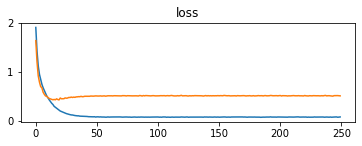

In [8]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t_loss,label="train")
plt.plot(v_loss,label="val")
plt.title("loss")
plt.subplot(2,1,2)
plt.plot(t_acc,label="train")
plt.plot(v_acc,label="val")
plt.title("accuracy")
plt.savefig("logs.jpg")